## Importing Libraries

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns   

## Importing the CSV file

In [2]:
df=pd.read_csv(r"Multiple CSV\9.random.csv",header=None) 
df.head() 

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [4]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

2
1.0    202
0.0    198
Name: count, dtype: int64

In [5]:
# Checking for outliers

<Axes: ylabel='0'>

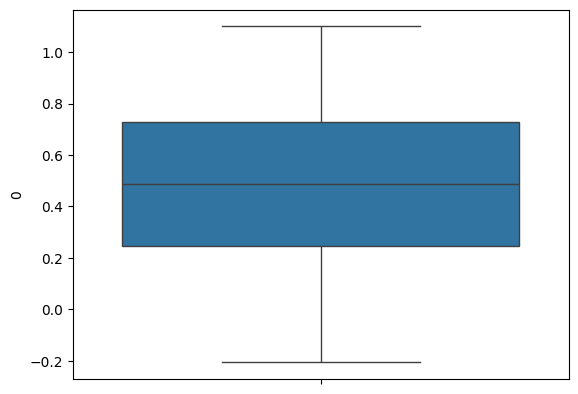

In [6]:
sns.boxplot(df[0])   

<Axes: ylabel='1'>

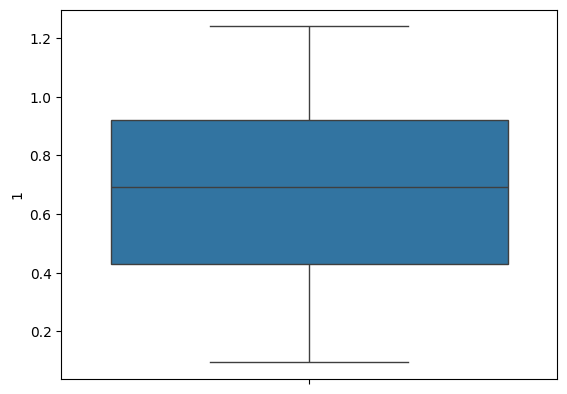

In [7]:
sns.boxplot(df[1])   

**Observation:**
- There is no outliers in the data

## Identifying the input and output features

In [8]:
x=df[[0,1]] 
y=df[2].astype(int)  

## Spliting the data into train and test

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)  

## Standardizing input features

In [10]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure

In [11]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

In [100]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dense(14,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01))) 

In [101]:
model.summary()   

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 20)                60        
                                                                 
 dense_61 (Dense)            (None, 16)                336       
                                                                 
 batch_normalization_8 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_62 (Dense)            (None, 14)                238       
                                                                 
 dense_63 (Dense)            (None, 10)                150       
                                                                 
 dense_64 (Dense)            (None, 1)                 11        
                                                     

In [106]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=100,validation_split=0.1) 

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 1.0271 - accuracy: 0.5458 - val_loss: 1.0375 - val_accuracy: 0.5000
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0230 - accuracy: 0.5784 - val_loss: 1.0356 - val_accuracy: 0.4706
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0199 - accuracy: 0.5654 - val_loss: 1.0361 - val_accuracy: 0.3824
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0164 - accuracy: 0.5948 - val_loss: 1.0277 - val_accuracy: 0.5294
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0139 - accuracy: 0.5359 - val_loss: 1.0279 - val_accuracy: 0.5000
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0108 - accuracy: 0.5719 - val_loss: 1.0257 - val_accuracy: 0.5588
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0089 - accuracy: 0.5490 - val_loss: 1.0203 - val_accuracy: 0.5882
Epoch 8/100


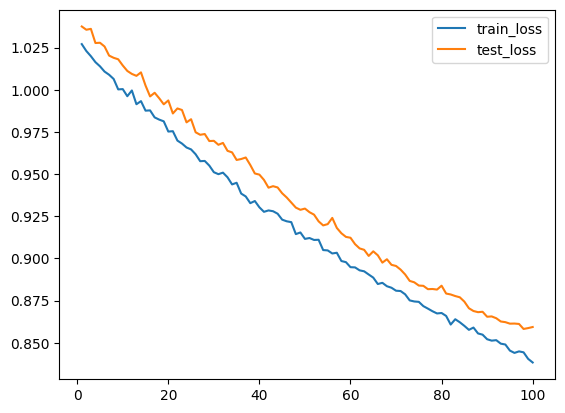

In [108]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [109]:
predicted=model.predict(x_test) 
predicted=np.where(predicted>0.5,1,0) 

2/2 [==============================] - 0s 4ms/step


## Evaluating the model

0.55


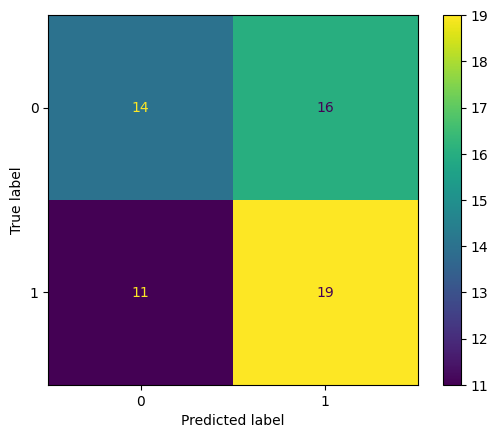

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTTING THE DECISION SURFACE

In [111]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

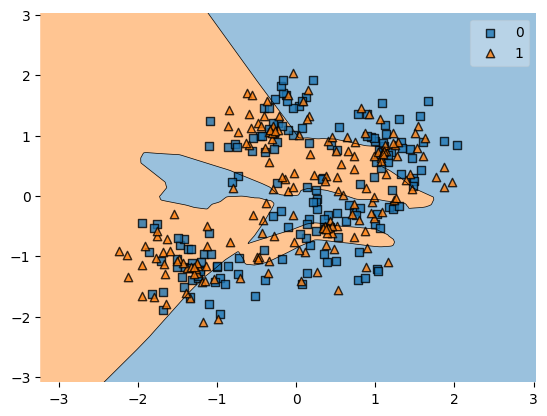

In [112]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

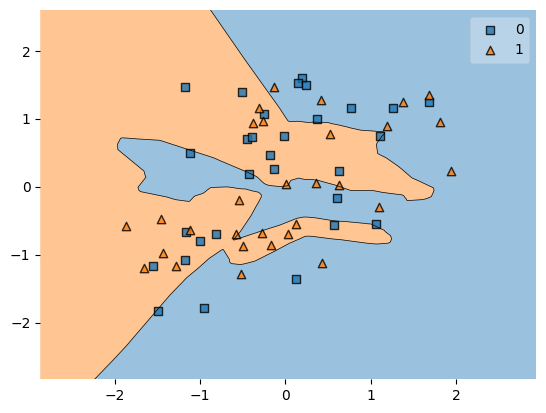

In [113]:
plot_decision_regions(x_test,y_test.values,clf=model)   

## Conclusions:
- As the data is random and full overlapped we cannot build a model and we cannot seggregate the datapoints.
- If we build model also it will be Dumb model.